# Calculadora de vigas - Andrés Felipe Cuscagua López

- Profesor: Jorge Eliecer Campuzano
- Materia: Analisis Estructural

### Paquetes utilizados

In [1]:
import numpy as np                 # Paquete para operar matrices usado en python
import alphas3Momentos as tablas   # Modulo que tiene las formulas de los 3 momentos para los alphas (desarrollado)
import Viga                        # Modulo para crear la estructura de datos "Viga" (desarrollado)
from diagramas import graficador   # Modulo para graficar los momentos de la viga (desarrollado)

### Se crea una viga y se pasa la información de cada tramo.

In [2]:
Mi_viga = Viga.Viga()

Cuantos tramos tiene la viga: 2


In [6]:
Mi_viga.definir_tramo(2)

Ingresando tramo: 2
Es un voladizo?: no
Es un empotramiento?: no
Cuantas cargas hay en el tramo?: 2
Escriba el tipo de la carga 1: puntual
Escriba la magnitud de la carga: 15
Escriba la distancia de la carga al extremo izquierdo del tramo: 10
----
Escriba el tipo de la carga 2: distribuida
Escriba la magnitud de la carga: 4.5
Escriba la distancia de la carga al extremo izquierdo del tramo: 0
Escriba la longitud de la carga: 16
----
Escriba la longitud del tramo: 16


In [7]:
Tramos = Mi_viga.tramos
Tramos

[{'voladizo': 'no',
  'empotrado': 'no',
  'cargas': {'carga 1': {'tipo': 'puntual',
    'magnitud': 5.0,
    'distancia': 3.0}},
  'n_cargas': 1,
  'L': 8.0},
 {'voladizo': 'no',
  'empotrado': 'no',
  'cargas': {'carga 1': {'tipo': 'puntual',
    'magnitud': 15.0,
    'distancia': 10.0},
   'carga 2': {'tipo': 'distribuida',
    'magnitud': 4.5,
    'distancia': 0.0,
    'longitud': 16.0}},
  'n_cargas': 2,
  'L': 16.0}]

### Se calculan los momentos

In [8]:
Mi_viga.momentos = Viga.calcular_momentos(Tramos)
Mi_viga.momentos

[0, -123.9296875, 0]

### Se calculan las reacciones

In [9]:
Mi_viga.Rs = Viga.obtener_Rs(Tramos, Mi_viga.momentos)
Mi_viga.Rs

array([-12.36621094,  66.73681641,  37.62939453])

### Se Inicializa el graficador

In [10]:
Graficas = graficador(Mi_viga)

### Gráfica de la Cortante

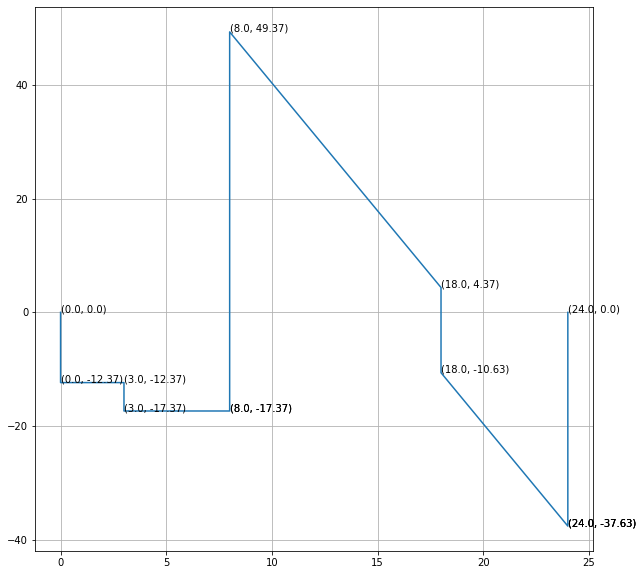

In [11]:
Graficas.grafica_cortante()

In [16]:
Graficas.plot_momento['X'].values[-1]

24.0

In [ ]:
np.trapz()

In [64]:
integral = [0]

for i in range(Graficas.plot_momento.shape[0]-1):
    p1 = Graficas.plot_momento.iloc[i,[1,2]]
    p2 = Graficas.plot_momento.iloc[i+1,[1,2]]
    
    if p1['X'] == p2['X']:
        integral.append(0)
    elif p1['Y'] == p2['Y']:
        x = np.array([x for x in np.arange(0, p2['X'] - p1['X'],0.1)])
        integral += (x * p1['Y']).tolist()

ValueError: x and y must have same first dimension, but have shapes (240,) and (89,)

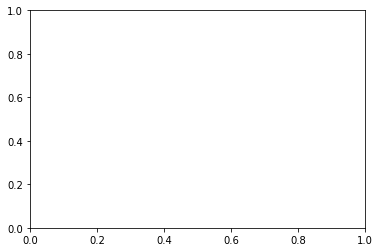

In [65]:
plt.figure()
plt.plot(list(range(len(np.arange(0, p1['X'],0.1)))), integral)
plt.show()

In [49]:
np.arange(0, p2['X'] - p1['X'],0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

In [12]:
Graficas.plot_momento

,tipo,X,Y
0,nada,0,0
1,reaccion,0,-12.3662
2,nada,3,-12.3662
3,puntual,3,-17.3662
4,nada,8,-17.3662
5,nada,8,-17.3662
6,reaccion,8,49.3706
7,distribuida,18,4.37061
8,puntual,18,-10.6294
9,distribuida,24,-37.6294


In [ ]:
import pandas as pd
import matplotlib.pylab as plt
tramo = Mi_viga.tramos[1]